### Construct simulation network

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_runner import plot_results, run_simulation, load_params

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_2vt54f1f
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

<Figure size 1500x800 with 0 Axes>

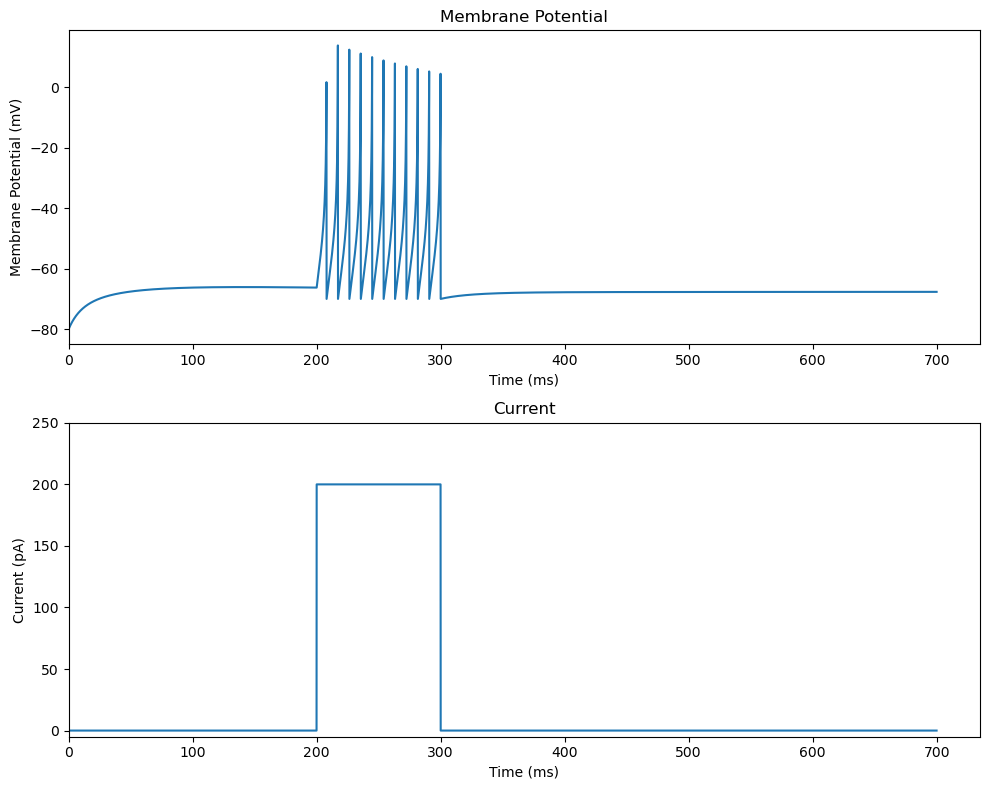

In [2]:
### STN (I = 15)
json_file = './params_ref/STN_1.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_zvqq8_ul
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

<Figure size 1500x800 with 0 Axes>

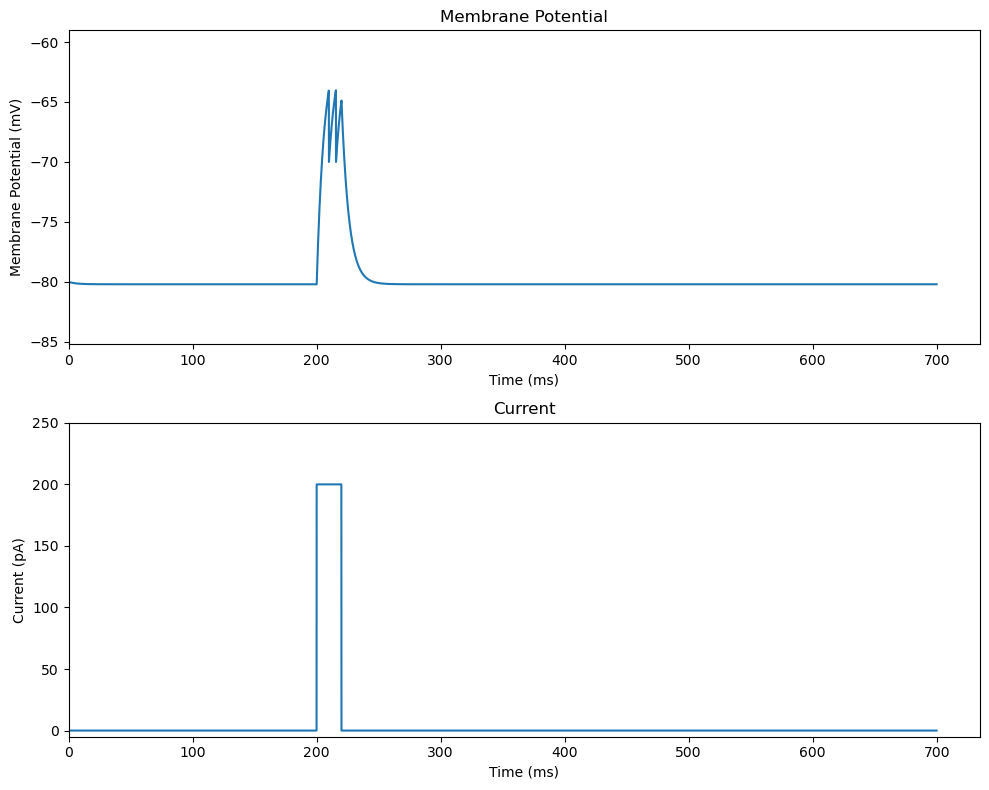

In [2]:
### STN (LIF)
json_file = './params_ref/STN_2.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

<Figure size 1500x800 with 0 Axes>

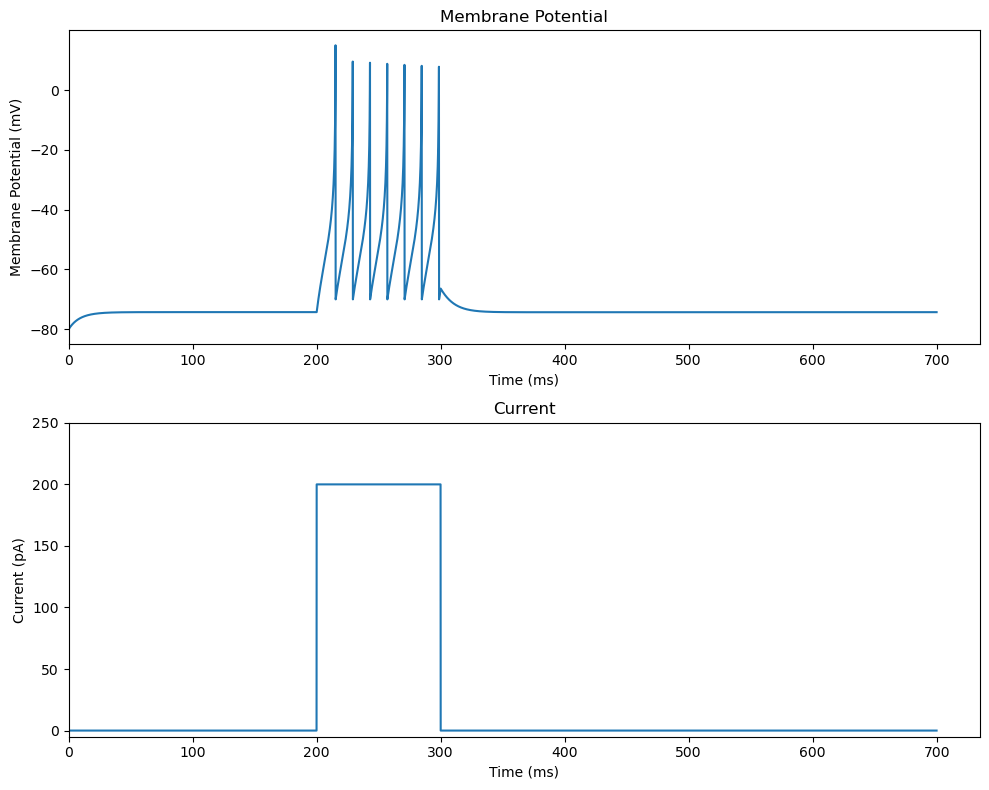

In [4]:
### STN
json_file = './params_ref/STN_3.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

### Synapse Connection

INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]


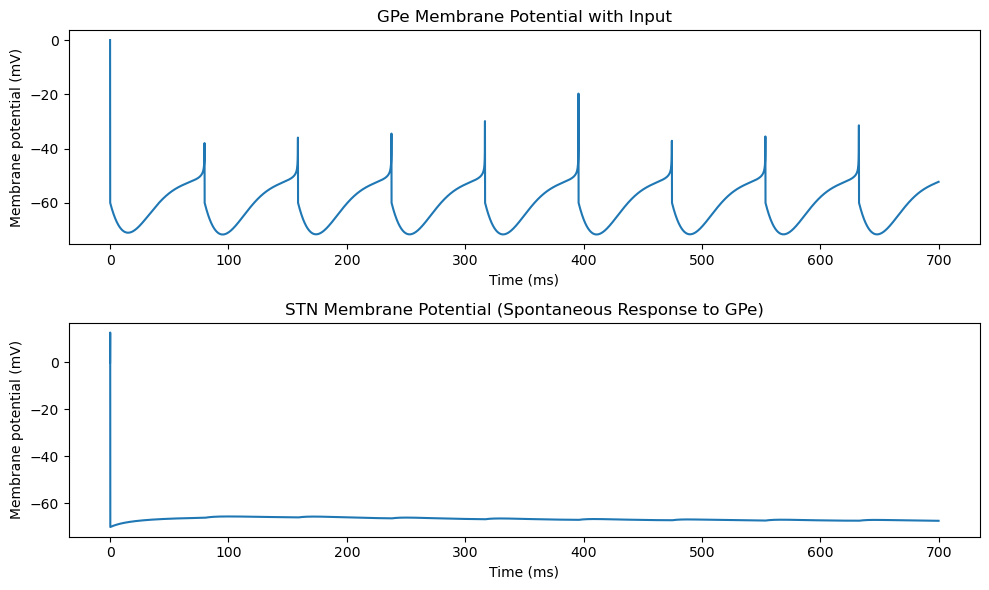

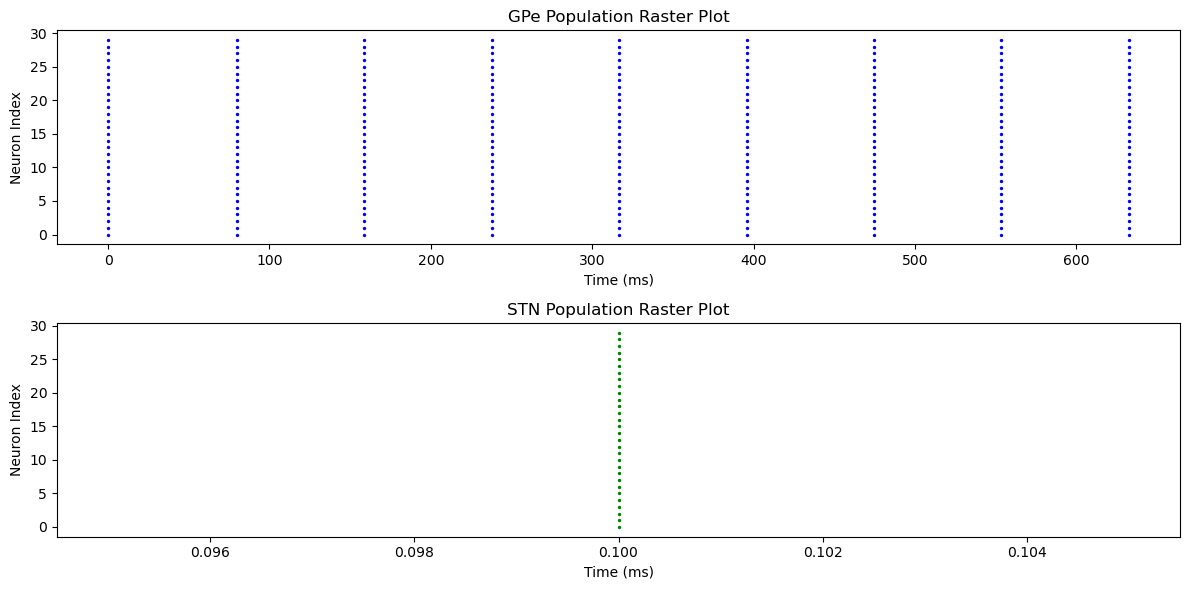

In [1]:
### Spontaneuous result without I
from simulation_runner_syn import run_simulation_without_input, plot_results_pre_post, plot_results_with_weight_matrix, plot_raster
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_STN = 30 

results = run_simulation_without_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_pre_post(results)
# plot_results_with_weight_matrix(results, N_GPe, N_STN)
plot_raster(results)

INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]


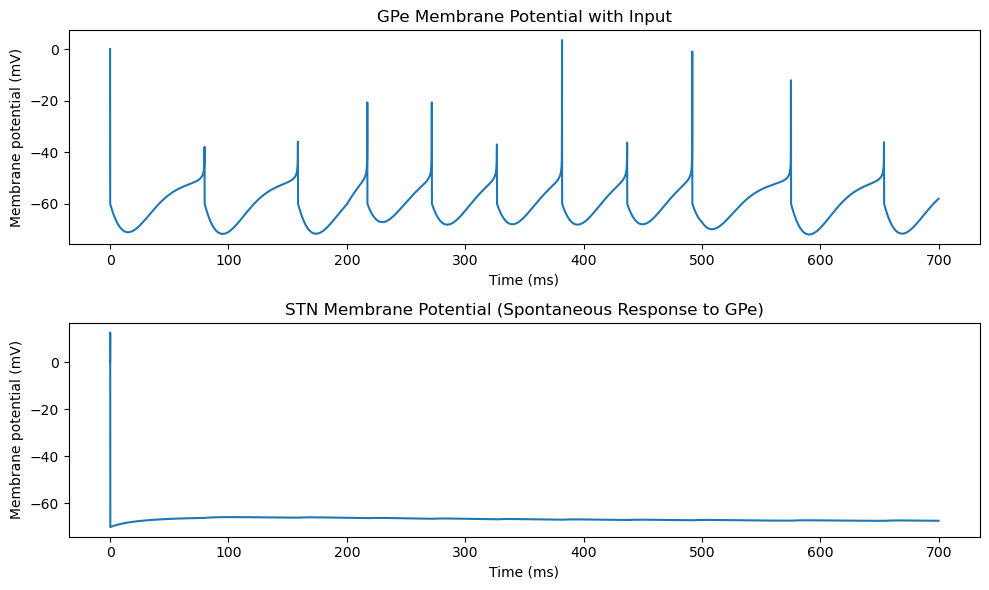

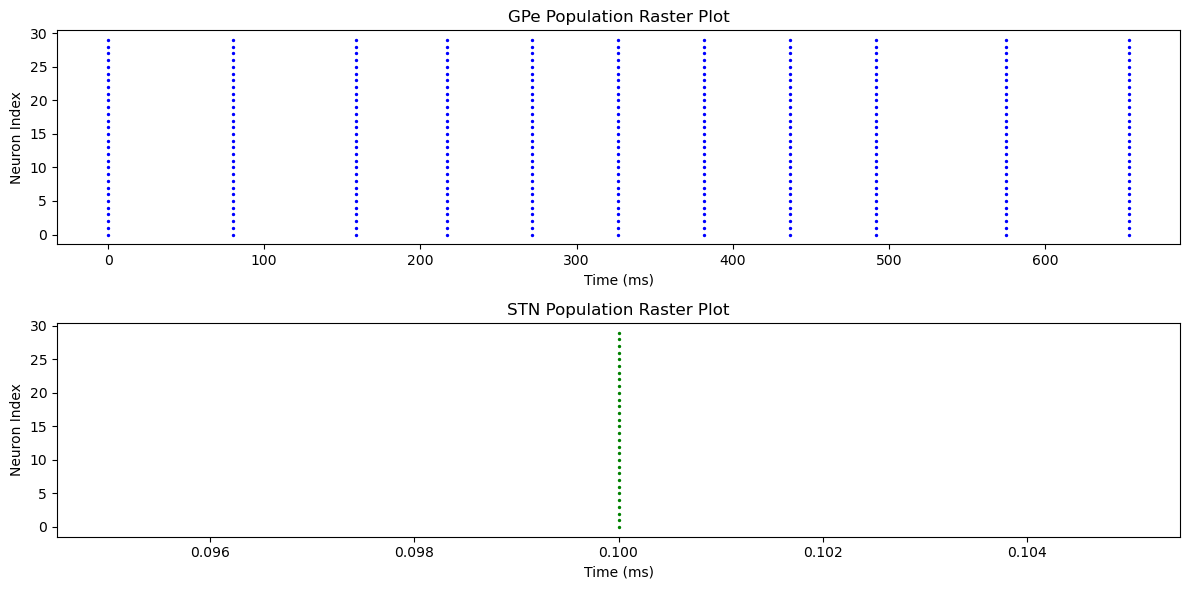

In [1]:
### Spontaneuous result with current I (200ms ~ 500ms)
from simulation_runner_syn import run_simulation_with_input, plot_results_pre_post, plot_raster
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_STN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_pre_post(results)
plot_raster(results)

INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


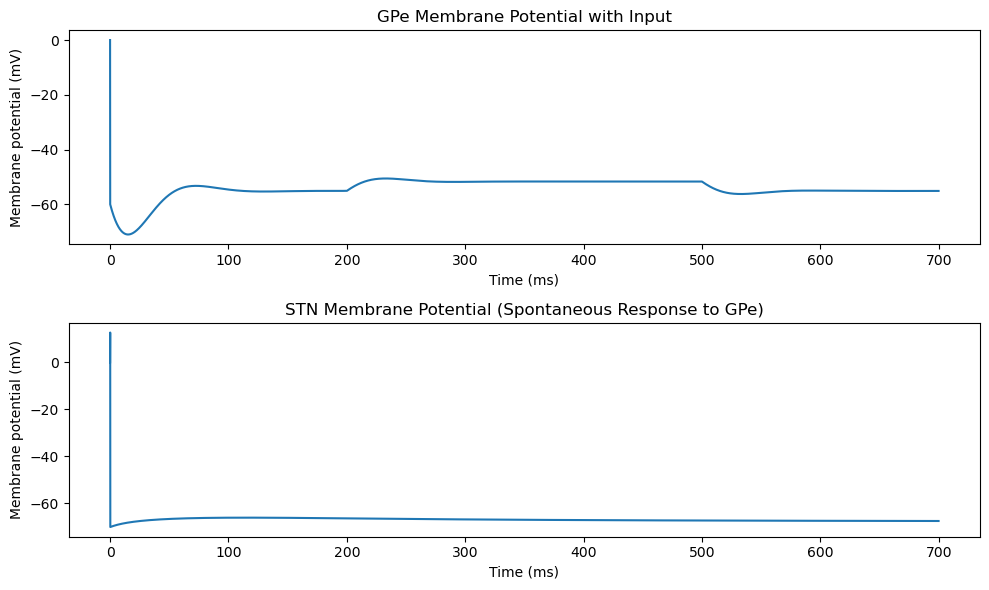

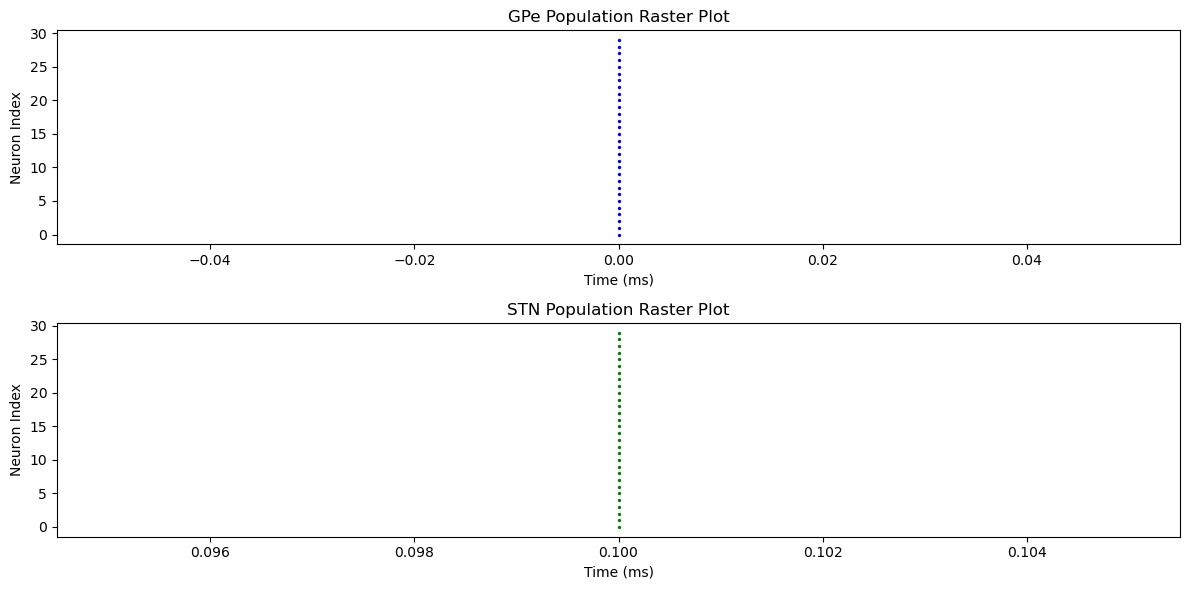

In [1]:
### adjust gap between vt, vr
from simulation_runner_syn import run_simulation_with_input, plot_results_pre_post, plot_raster
from brian2 import * 

gpe_params_file = './params_ref/GPe_T1_1_temp.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_STN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_pre_post(results)
plot_raster(results)

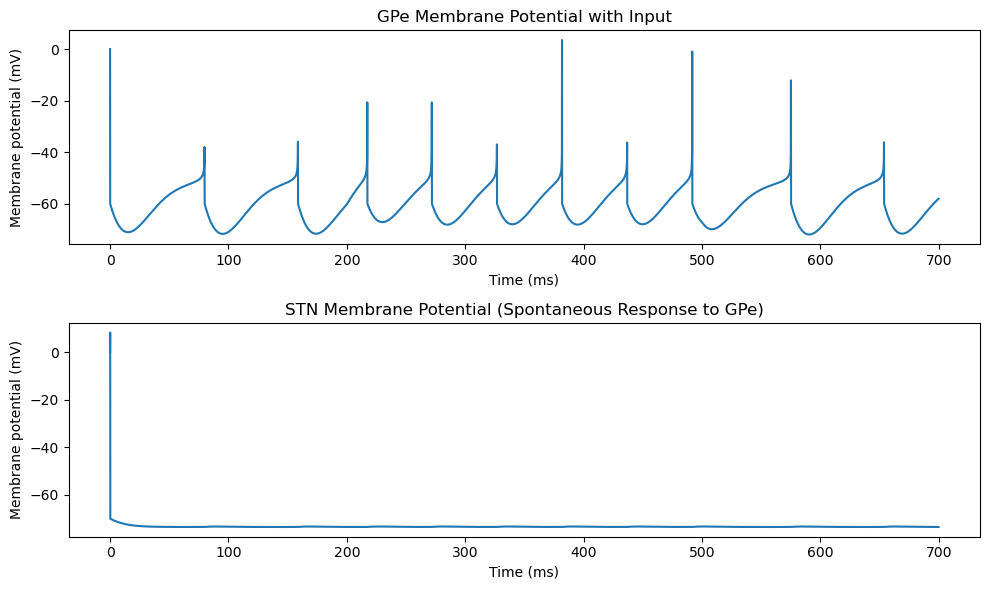

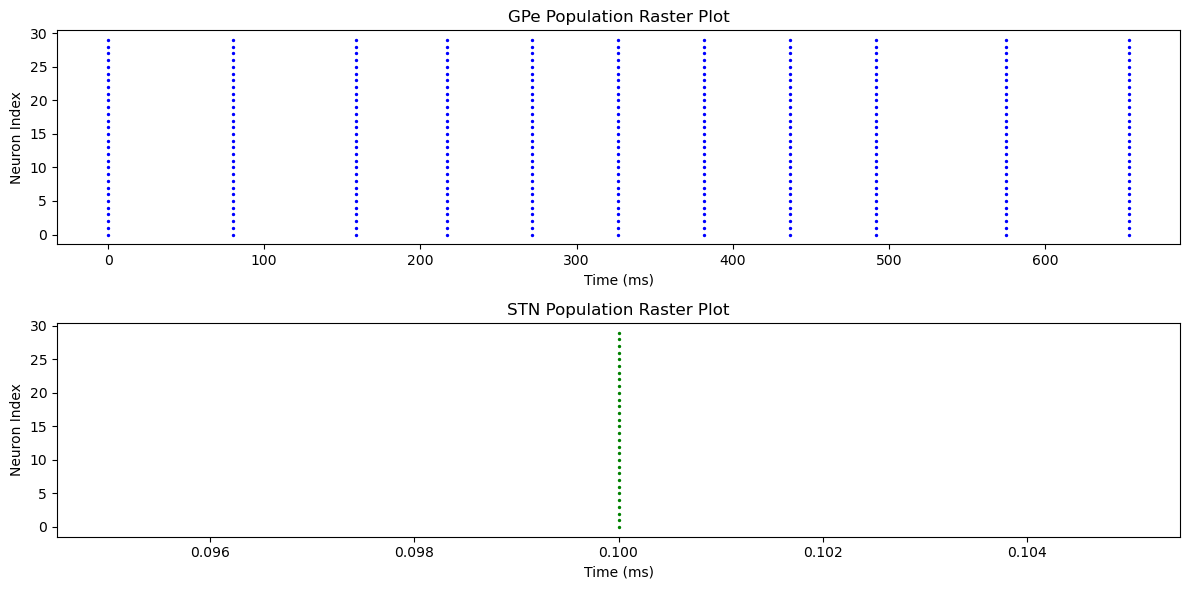

In [4]:
### Spontaneuous result with current I (ref 3)
from simulation_runner_syn import run_simulation_with_input, plot_results_pre_post, plot_raster
from brian2 import * 

gpe_params_file = './params_ref/GPe_T1_3.json'
stn_params_file = './params_ref/STN_3.json'

synapse_params = {
    'g0': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV
}

N_GPe = 30 
N_STN = 30 

results = run_simulation_with_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_pre_post(results)
plot_raster(results)

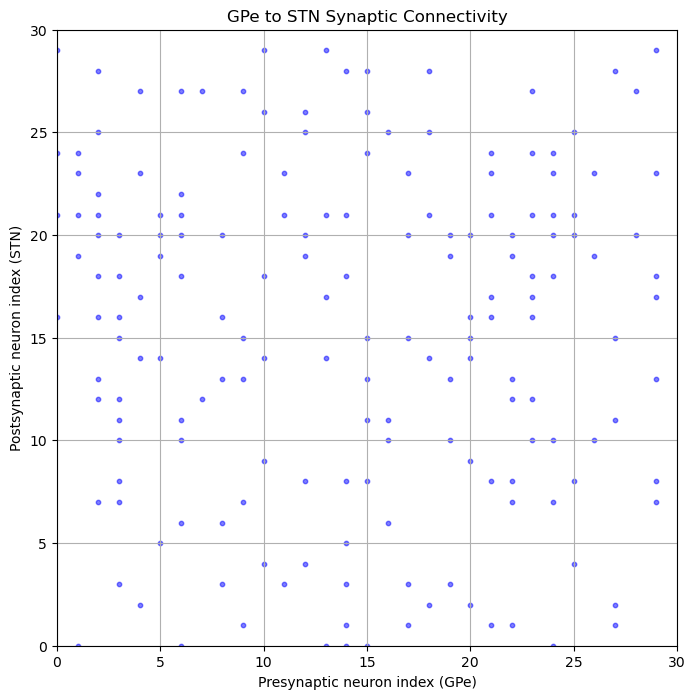

In [5]:
from simulation_runner_syn import plot_connectivity
plot_connectivity(results['synapse'], N_GPe, N_STN, title='GPe to STN Synaptic Connectivity')

### Striatum - GPe - STN inhibitory (GABA)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]


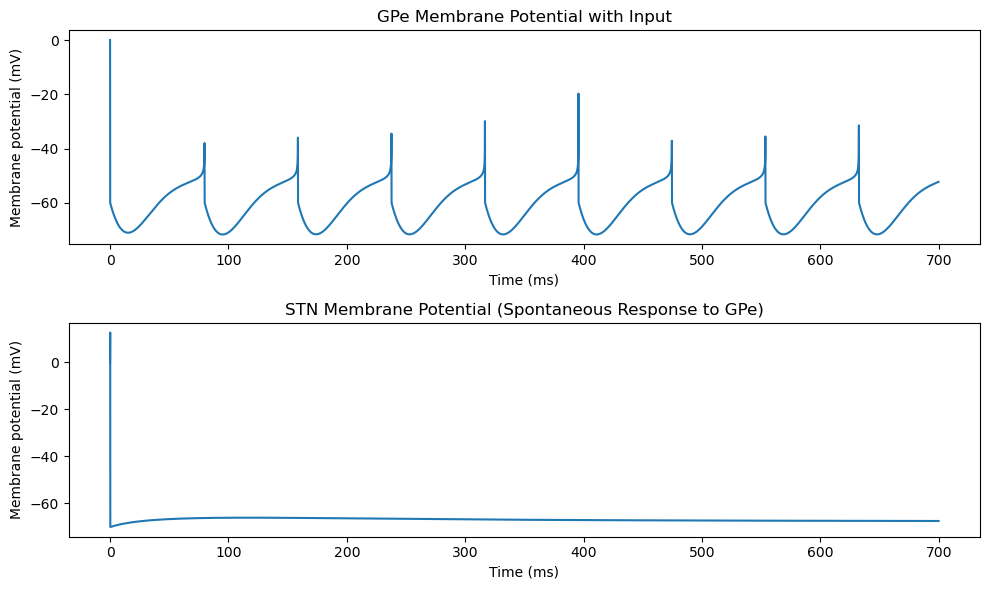

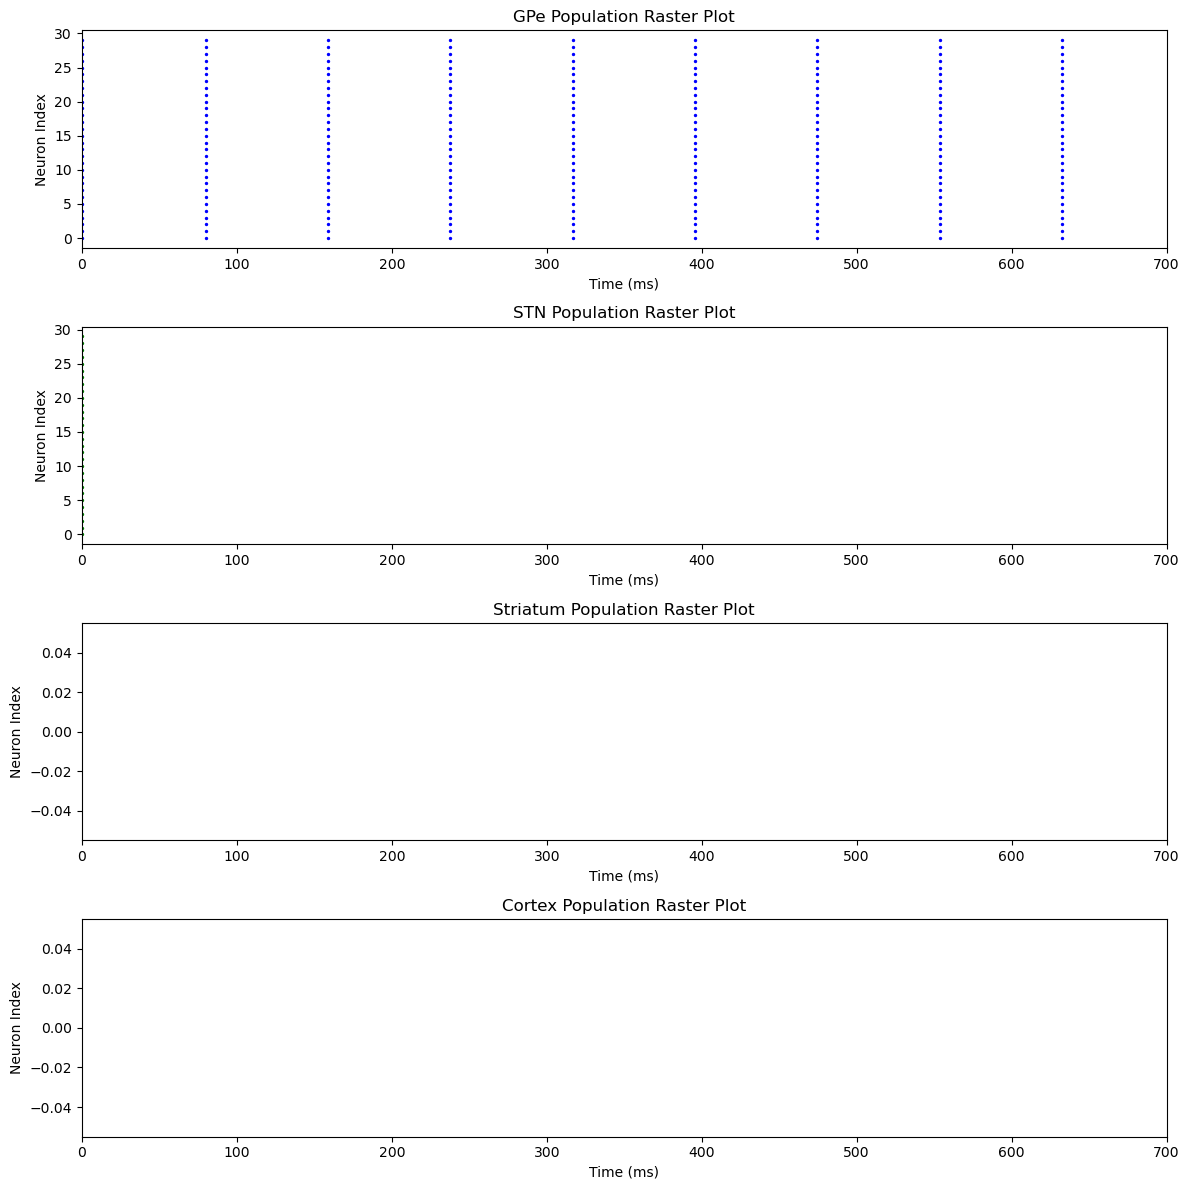

In [1]:
### Result with inh/ext input 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_raster_str_ctx, plot_results_pre_post
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'
striatum_params_file = './params_ref/MSN_D2_2.json'

synapse_params = {
    # GPe - STN
    'g0': 1*nS,
    'tau_syn': 8*ms,  # ampa (Hanson & Dieter Jaeger 2002)
    'E_GABA': -84*mV,
  
    # EXT - GPe
    'striatum_g0': 0.5 * nS,
    'striatum_ampa_E_rev': 0 * mV,
    'striatum_ampa_tau_syn': 5 * ms,

    # EXT - STN
    'stn_ampa_g0': 0.25 * nS,
    'stn_ampa_E_rev': 0 * mV,
    'stn_ampa_tau_syn': 4 * ms
}

N_GPe = 30 
N_STN = 30 
N_Striatum = 30 

results = run_simulation_with_inh_ext_input(
    N_GPe,
    N_STN,
    N_Striatum,  # Pass the new parameter
    gpe_params_file,
    stn_params_file,
    striatum_params_file,  # Pass the new file
    synapse_params,
    'GPe', 
    'STN', 
    "Striatum",  # Add Striatum model class
    "GPe_STN_inh_ext"
)

plot_results_pre_post(results)
plot_raster_str_ctx(results)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]


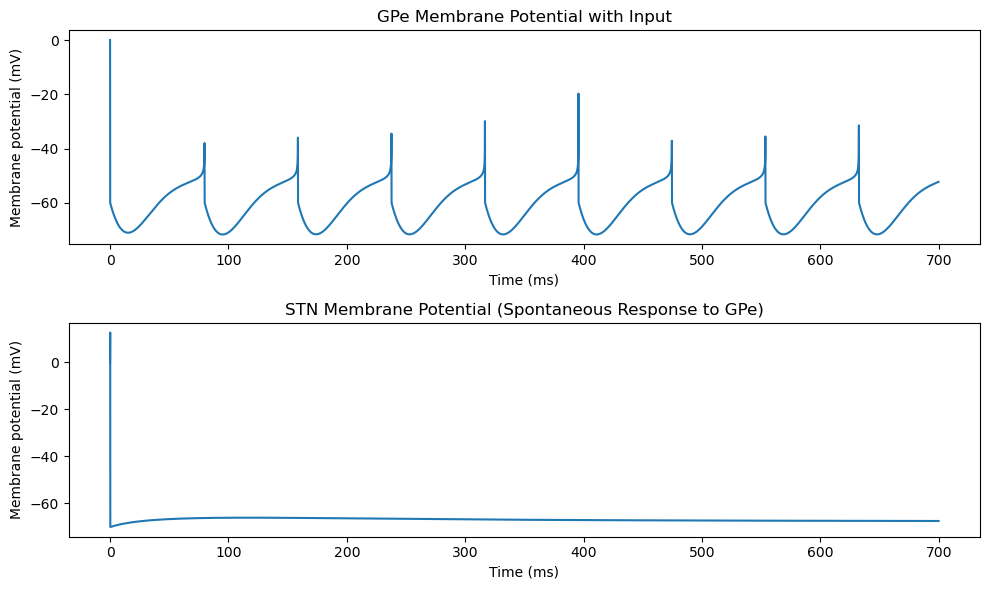

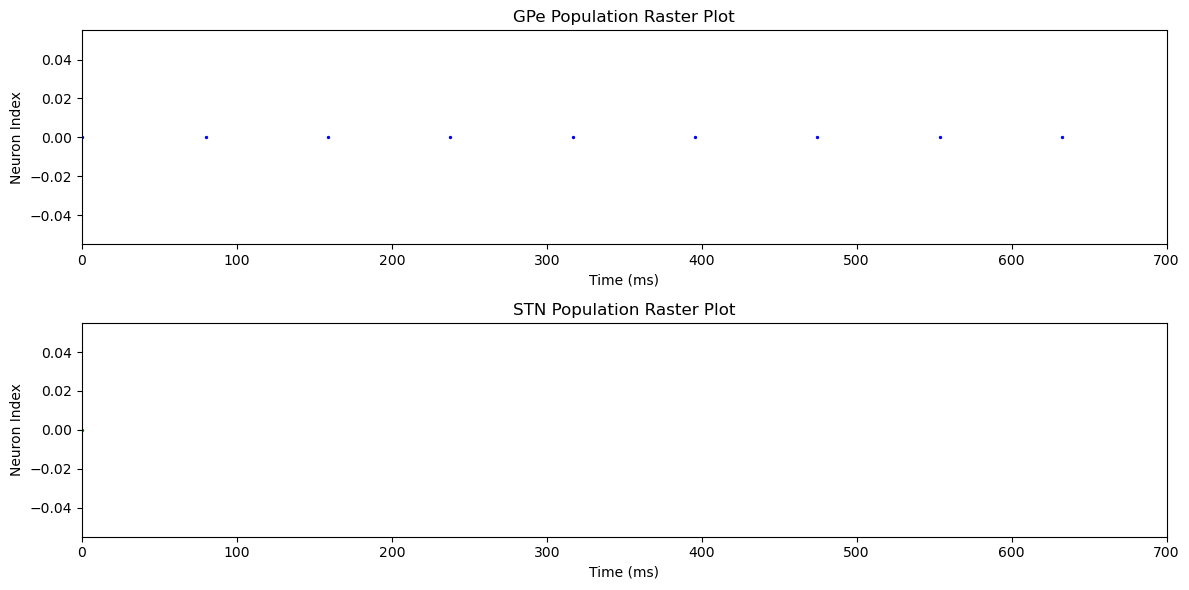

In [1]:
### Result with inh/ext input with only one neuron 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_results_pre_post, plot_raster
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    # EXT - GPe
    'striatum_g0': 0.5 * nS,
    'striatum_ampa_E_rev': 0 * mV,
    'striatum_ampa_tau_syn': 5 * ms,

    # GPe - STN
    'g0': 1*nS,
    'ampa_tau_syn': 8*ms,  # ampa (Hanson & Dieter Jaeger 2002)
    'ampa_E_rev': -84*mV
  
}

N_GPe = 1
N_STN = 1 

results = run_simulation_with_inh_ext_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN_inh_ext"
)

plot_results_pre_post(results)
plot_raster(results)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]


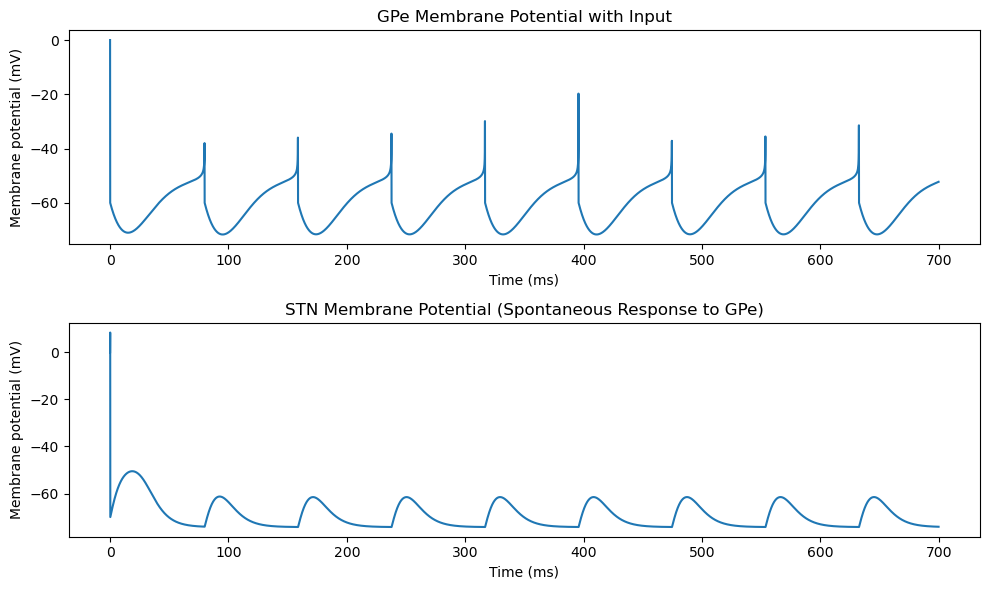

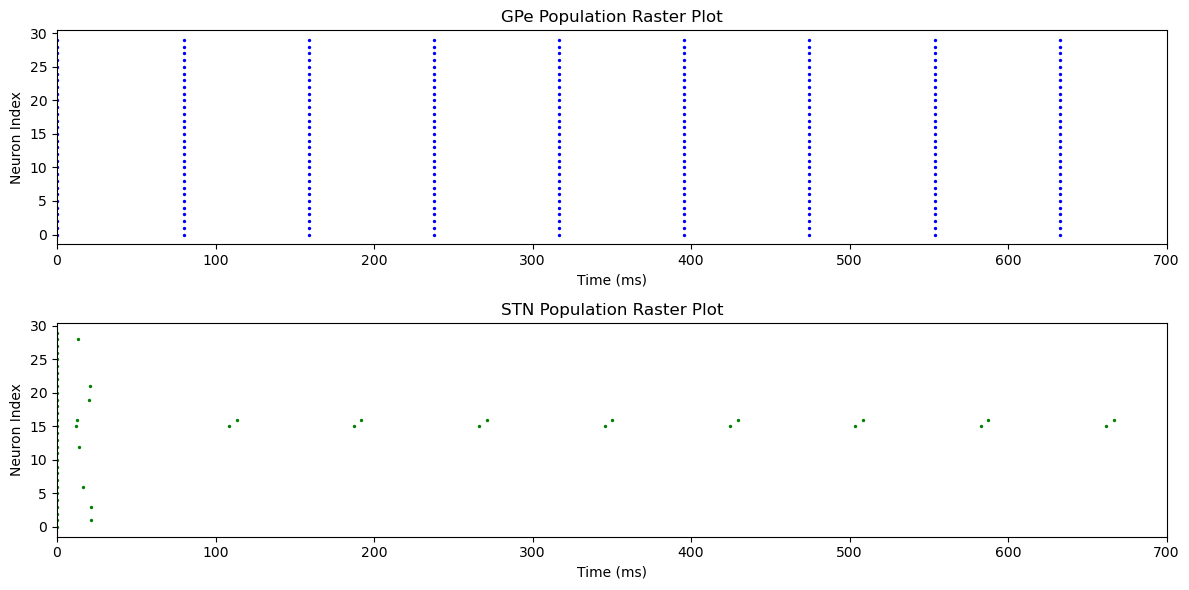

In [1]:
### Result with inh/ext input 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_results_pre_post, plot_raster

gpe_params_file = './params_ref/GPe_T1_3.json' 
stn_params_file = './params_ref/STN_3.json'

synapse_params = {
    # EXT - GPe
    'striatum_g0': 0.5 * nS,
    'striatum_ampa_E_rev': 0 * mV,
    'striatum_ampa_tau_syn': 5 * ms,

    # GPe - STN
    'g0': 1*nS,
    'ampa_tau_syn': 8*ms,  # ampa (Hanson & Dieter Jaeger 2002)
    'ampa_E_rev': -84*mV
  
}

N_GPe = 30 
N_STN = 30 

results = run_simulation_with_inh_ext_input(
    N_GPe,
    N_STN,
    gpe_params_file,
    stn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN_inh_ext"
)

plot_results_pre_post(results)
plot_raster(results)

In [2]:
### Visualization connection 
from simulation_runner_syn import plot_neuron_connections_3D
import numpy as np

# Example neuron positions (random)
neuron_positions = np.random.rand(10, 3) * 100  # 10 neurons in 3D space

# Example connections (random pairs of neurons)
connections = [(i, (i+1) % 10) for i in range(10)]  # Create circular connections

# Call the plotting function
plot_neuron_connections_3D(neuron_positions, connections)

- STDP: normal vs dopamine 
- https://brian2.readthedocs.io/en/stable/examples/frompapers.Izhikevich_2007.html

- AdEX parameter list
- https://brian2.readthedocs.io/en/stable/examples/frompapers.Naud_et_al_2008_adex_firing_patterns.html
- delay 파라미터: 논문3 table1 참고